# **Importing Libraries**

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# **Data Loading**

In [44]:
import pandas as pd

data = pd.read_csv('Loan_default.csv')
data.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


# **Data Exploration**

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Age             255347 non-null  int64  
 1   Income          255347 non-null  int64  
 2   LoanAmount      255347 non-null  int64  
 3   CreditScore     255347 non-null  int64  
 4   MonthsEmployed  255347 non-null  int64  
 5   NumCreditLines  255347 non-null  int64  
 6   InterestRate    255347 non-null  float64
 7   LoanTerm        255347 non-null  int64  
 8   DTIRatio        255347 non-null  float64
 9   Education       255347 non-null  object 
 10  EmploymentType  255347 non-null  object 
 11  MaritalStatus   255347 non-null  object 
 12  HasMortgage     255347 non-null  object 
 13  HasDependents   255347 non-null  object 
 14  LoanPurpose     255347 non-null  object 
 15  HasCoSigner     255347 non-null  object 
 16  Default         255347 non-null  int64

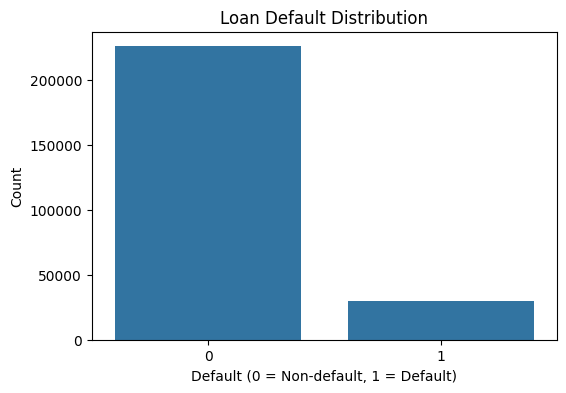


Class Distribution (%):
Default
0    88.387175
1    11.612825
Name: proportion, dtype: float64


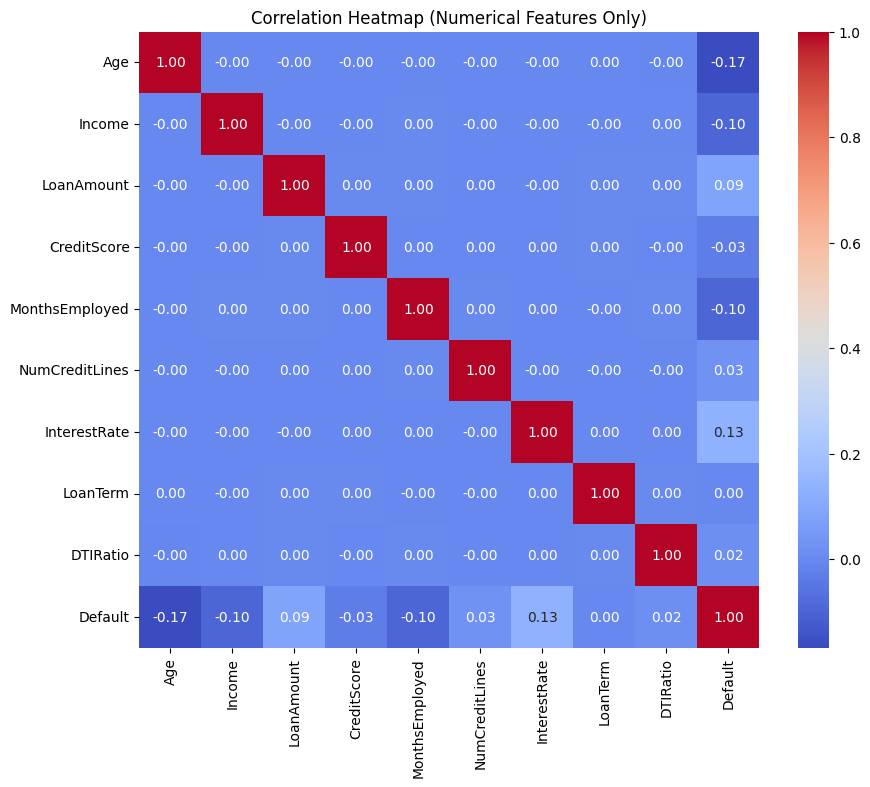

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

data = data.drop(columns=['LoanID'], errors='ignore')

print("Dataset Overview:")
print(data.info())

print("\nSummary Statistics:")
print(data.describe())

print("\nMissing Values:")
print(data.isnull().sum())

plt.figure(figsize=(6, 4))
sns.countplot(x='Default', data=data)
plt.title("Loan Default Distribution")
plt.xlabel("Default (0 = Non-default, 1 = Default)")
plt.ylabel("Count")
plt.show()

default_ratio = data['Default'].value_counts(normalize=True) * 100
print("\nClass Distribution (%):")
print(default_ratio)

numerical_data = data.select_dtypes(include=[np.number])

plt.figure(figsize=(10, 8))
sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap (Numerical Features Only)")
plt.show()

# **Plots**

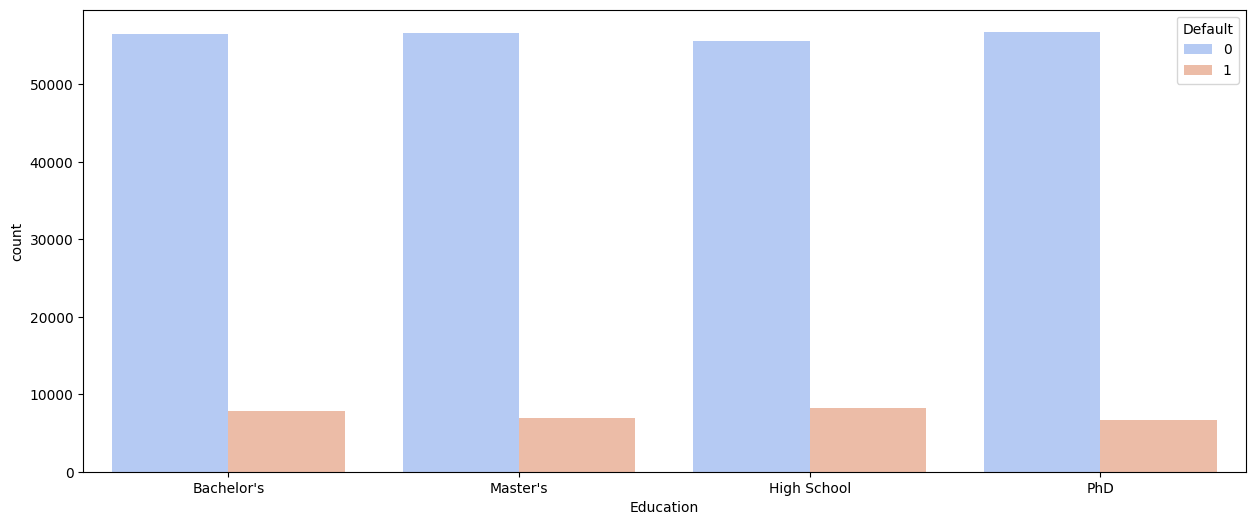

In [46]:
plt.figure(figsize=(15, 6))
sns.countplot(data=data, x="Education", hue="Default", palette='coolwarm')
plt.show()

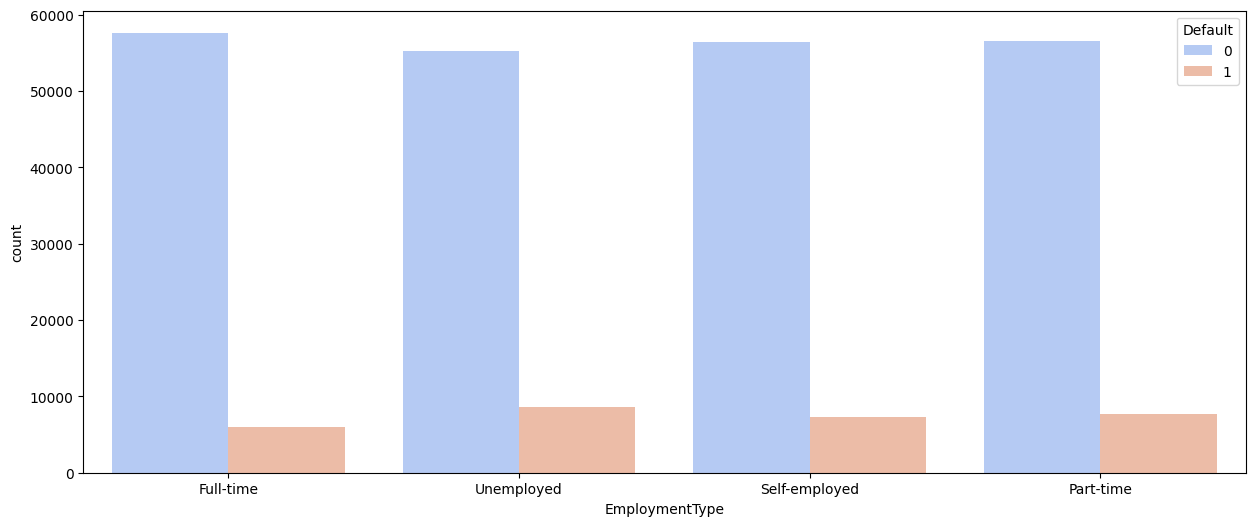

In [47]:
plt.figure(figsize=(15, 6))
sns.countplot(data=data, x="EmploymentType", hue="Default", palette='coolwarm')
plt.show()

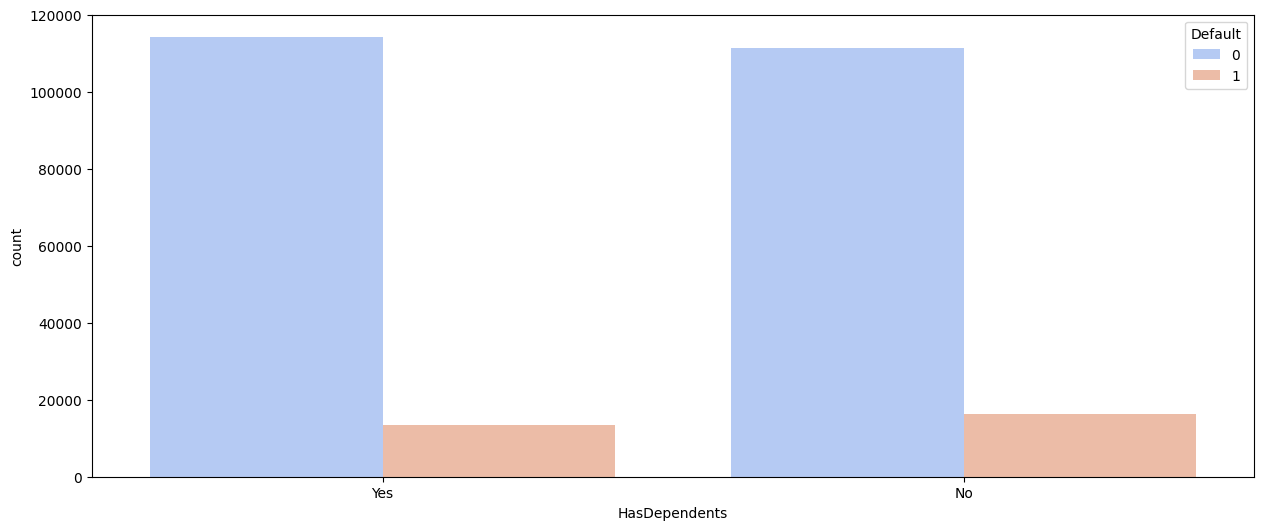

In [48]:
plt.figure(figsize=(15, 6))
sns.countplot(data=data, x="HasDependents", hue="Default", palette='coolwarm')
plt.show()

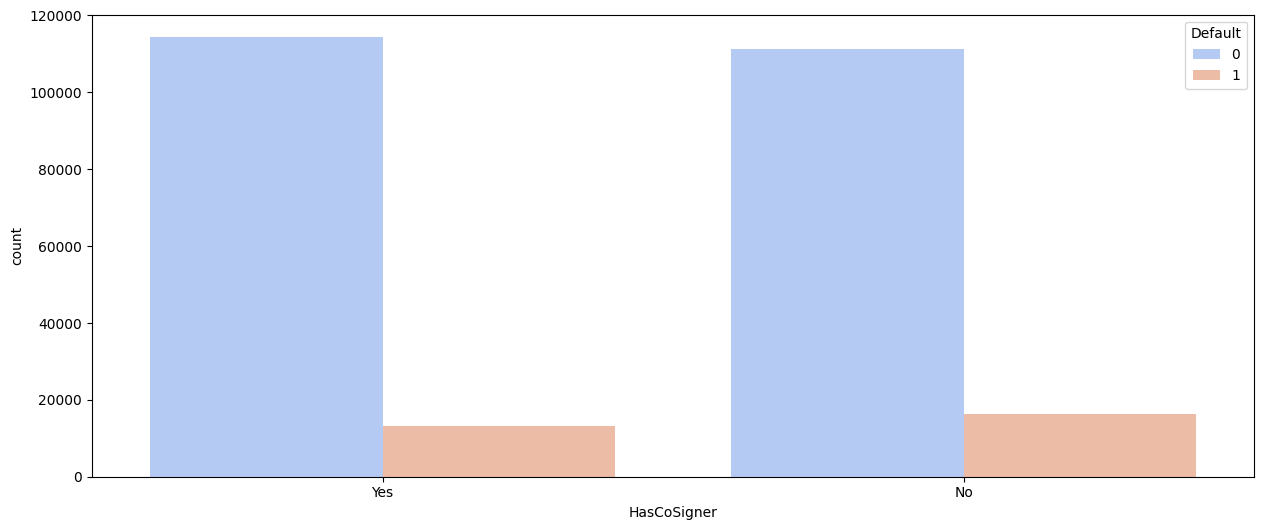

In [49]:
plt.figure(figsize=(15,6))
sns.countplot(data=data,x = 'HasCoSigner',hue = 'Default',palette='coolwarm')
plt.show()

/tmp/ipython-input-1228876575.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x = 'Default', y = 'MonthsEmployed',palette='coolwarm')


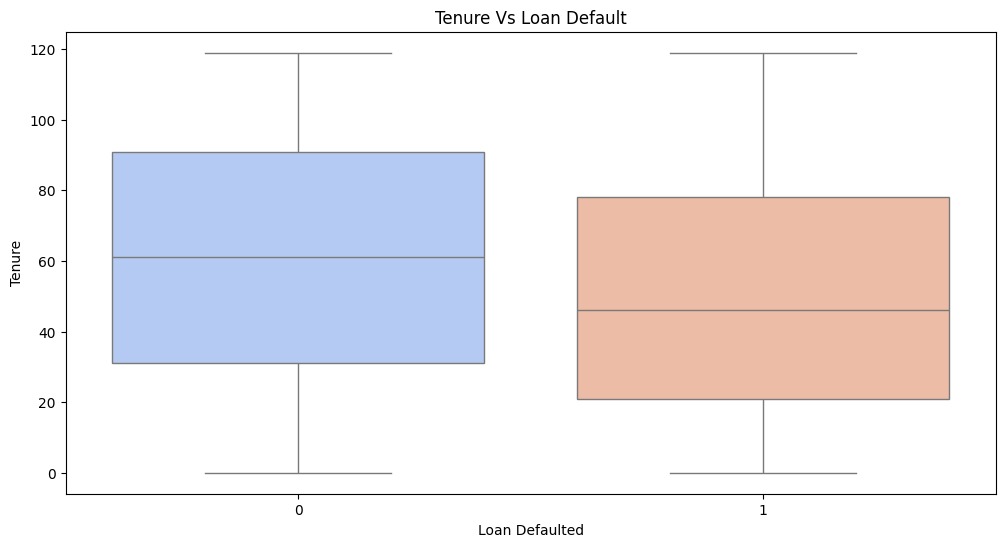

In [50]:
plt.figure(figsize=(12,6))
sns.boxplot(data=data, x = 'Default', y = 'MonthsEmployed',palette='coolwarm')
plt.xlabel('Loan Defaulted')
plt.ylabel('Tenure')
plt.title('Tenure Vs Loan Default')
plt.show()

/tmp/ipython-input-3380984000.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x = 'Default', y = 'NumCreditLines', palette='coolwarm')


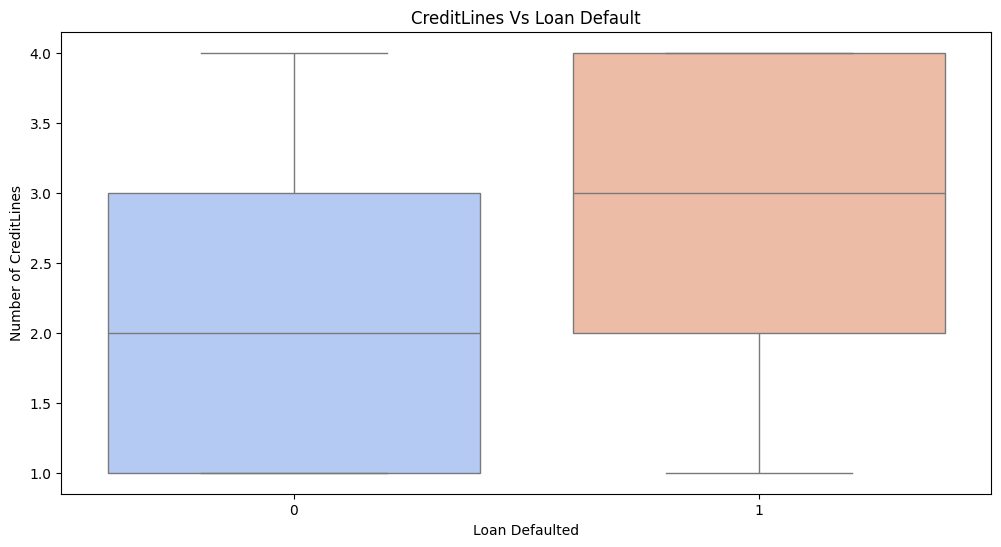

In [51]:
plt.figure(figsize=(12,6))
sns.boxplot(data=data, x = 'Default', y = 'NumCreditLines', palette='coolwarm')
plt.xlabel('Loan Defaulted')
plt.ylabel('Number of CreditLines')
plt.title('CreditLines Vs Loan Default')
plt.show()

/tmp/ipython-input-2823306544.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Default', y='Income',palette='coolwarm')


Text(0.5, 1.0, 'Income vs Loan Default')

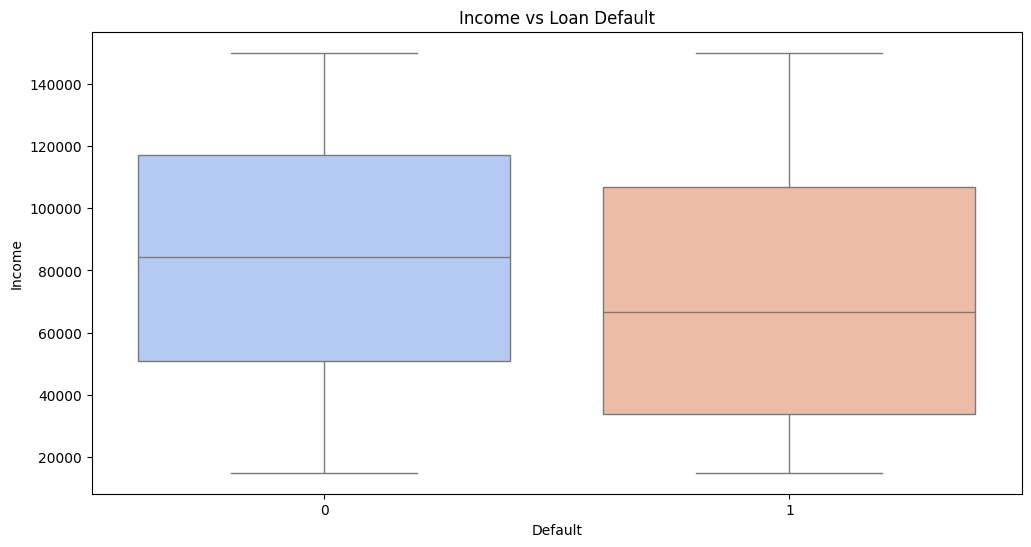

In [52]:
plt.figure(figsize=(12,6))
sns.boxplot(data=data, x='Default', y='Income',palette='coolwarm')
plt.title('Income vs Loan Default')

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


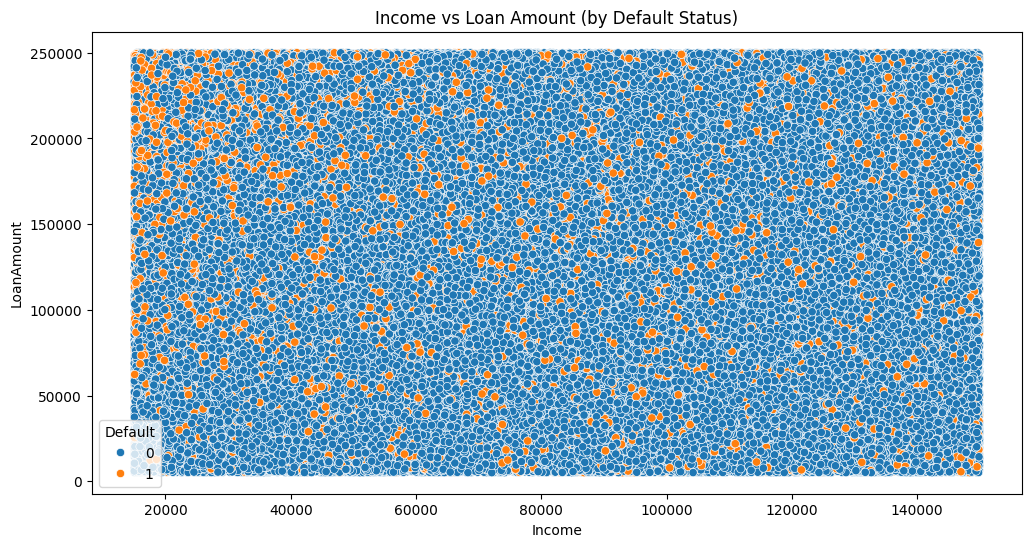

In [53]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=data, x='Income', y='LoanAmount', hue='Default')
plt.title('Income vs Loan Amount (by Default Status)')
plt.show()

/tmp/ipython-input-211253330.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x='HasMortgage', y='Default', palette='coolwarm')


Text(0.5, 1.0, 'Mortgage Ownership vs Loan Default')

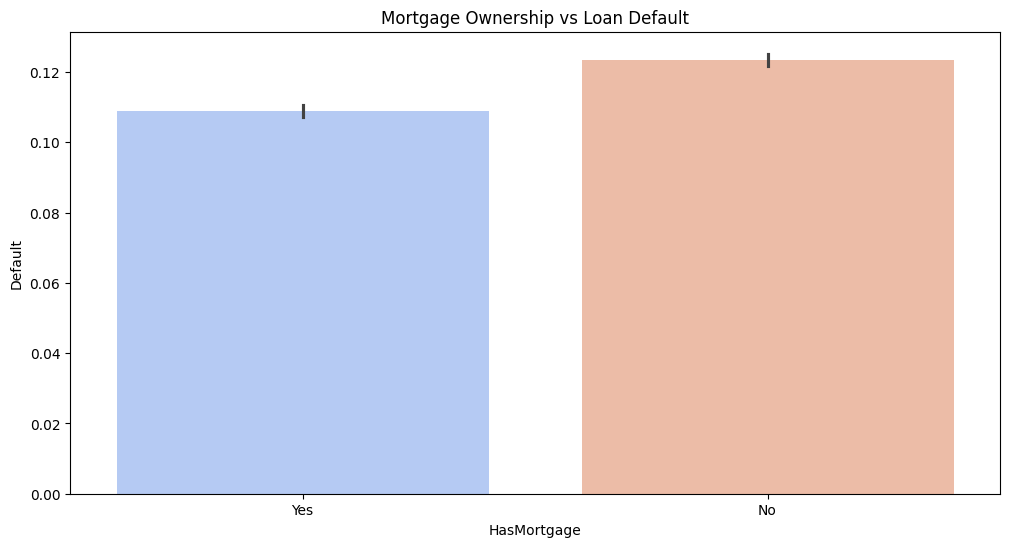

In [54]:
plt.figure(figsize=(12,6))
sns.barplot(data=data, x='HasMortgage', y='Default', palette='coolwarm')
plt.title('Mortgage Ownership vs Loan Default')

# **Data Preprocessing**

In [55]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE

data = data.drop(columns=['LoanID'], errors='ignore')

binary_col = ['HasMortgage', 'HasDependents', 'HasCoSigner']
for col in binary_col:
    data[col] = data[col].apply(lambda x: 1 if x == 'Yes' else 0)

label_encoder = LabelEncoder()
data['Education'] = label_encoder.fit_transform(data['Education'])
data['EmploymentType'] = label_encoder.fit_transform(data['EmploymentType'])
data['MaritalStatus'] = label_encoder.fit_transform(data['MaritalStatus'])
data['LoanPurpose'] = label_encoder.fit_transform(data['LoanPurpose'])

data['Loan_to_Income_Ratio'] = data['LoanAmount'] / data['Income']

X = data.drop(columns=['Default'])
y = data['Default']

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print("\nClass Distribution After SMOTE:")
print(y_resampled.value_counts())

X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.3, random_state=42
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("\nData Preprocessing Completed!")


Class Distribution After SMOTE:
Default
0    225694
1    225694
Name: count, dtype: int64

Data Preprocessing Completed!


In [56]:
data.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default,Loan_to_Income_Ratio
0,56,85994,50587,520,80,4,15.23,36,0.44,0,0,0,1,1,4,1,0,0.588262
1,69,50432,124440,458,15,1,4.81,60,0.68,2,0,1,0,0,4,1,0,2.467481
2,46,84208,129188,451,26,3,21.17,24,0.31,2,3,0,1,1,0,0,1,1.534154
3,32,31713,44799,743,0,3,7.07,24,0.23,1,0,1,0,0,1,0,0,1.412638
4,60,20437,9139,633,8,4,6.51,48,0.73,0,3,0,0,1,0,0,0,0.447179


# **Model Training and Evaluation**

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier

models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)

    results[name] = {
        "Accuracy": accuracy,
        "F1-Score": f1,
        "Precision": precision,
        "Recall": recall,
        "ROC-AUC": roc_auc
    }

    print(f"Model: {name}")
    print(f"Accuracy: {accuracy:.4f}, F1-Score: {f1:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, ROC-AUC: {roc_auc:.4f}")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print("-" * 50)

results_df = pd.DataFrame(results).T
print("\nModel Comparison:")
print(results_df)

Model: Logistic Regression
Accuracy: 0.7862, F1-Score: 0.7881, Precision: 0.7815, Recall: 0.7947, ROC-AUC: 0.7862
[[52624 15049]
 [13906 53838]]
              precision    recall  f1-score   support

           0       0.79      0.78      0.78     67673
           1       0.78      0.79      0.79     67744

    accuracy                           0.79    135417
   macro avg       0.79      0.79      0.79    135417
weighted avg       0.79      0.79      0.79    135417

--------------------------------------------------
Model: Random Forest
Accuracy: 0.8771, F1-Score: 0.8743, Precision: 0.8954, Recall: 0.8541, ROC-AUC: 0.8771
[[60914  6759]
 [ 9883 57861]]
              precision    recall  f1-score   support

           0       0.86      0.90      0.88     67673
           1       0.90      0.85      0.87     67744

    accuracy                           0.88    135417
   macro avg       0.88      0.88      0.88    135417
weighted avg       0.88      0.88      0.88    135417

-----------

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [21:49:37] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Model: XGBoost
Accuracy: 0.8968, F1-Score: 0.8920, Precision: 0.9360, Recall: 0.8519, ROC-AUC: 0.8968
[[63727  3946]
 [10035 57709]]
              precision    recall  f1-score   support

           0       0.86      0.94      0.90     67673
           1       0.94      0.85      0.89     67744

    accuracy                           0.90    135417
   macro avg       0.90      0.90      0.90    135417
weighted avg       0.90      0.90      0.90    135417

--------------------------------------------------
Model: Decision Tree
Accuracy: 0.8165, F1-Score: 0.8196, Precision: 0.8063, Recall: 0.8333, ROC-AUC: 0.8165
[[54113 13560]
 [11291 56453]]
              precision    recall  f1-score   support

           0       0.83      0.80      0.81     67673
           1       0.81      0.83      0.82     67744

    accuracy                           0.82    135417
   macro avg       0.82      0.82      0.82    135417
weighted avg       0.82      0.82      0.82    135417

-----------------------

# **ROC Curve Visualization**

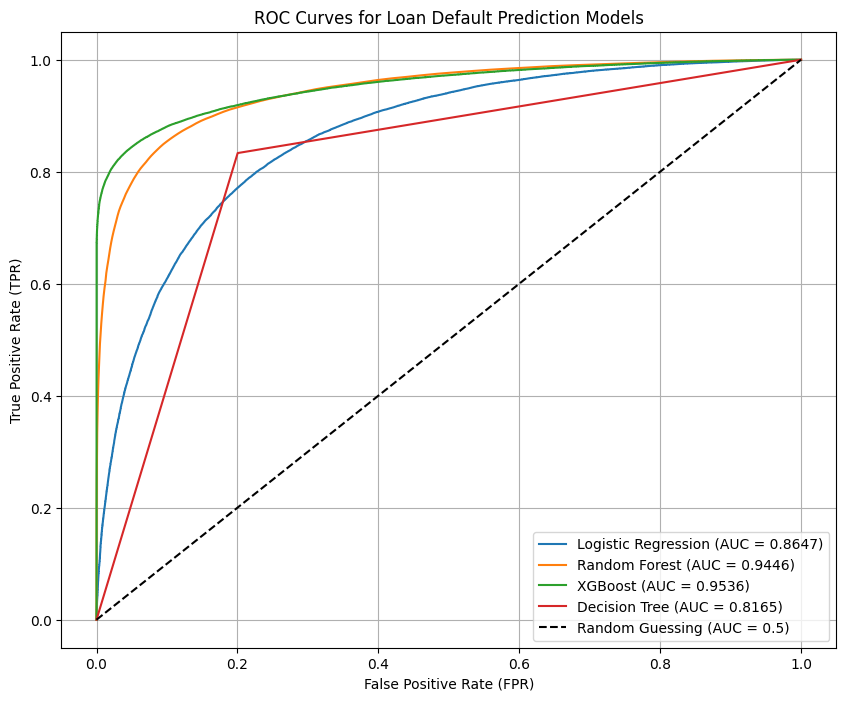

In [58]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

def plot_roc_curves(models, X_test, y_test):
    plt.figure(figsize=(10, 8))

    for name, model in models.items():
        if hasattr(model, "predict_proba"):
            y_pred_prob = model.predict_proba(X_test)[:, 1]
        else:
            y_pred_prob = model.decision_function(X_test)

        fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
        roc_auc = auc(fpr, tpr)

        plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.4f})")

    plt.plot([0, 1], [0, 1], 'k--', label="Random Guessing (AUC = 0.5)")

    plt.xlabel("False Positive Rate (FPR)")
    plt.ylabel("True Positive Rate (TPR)")
    plt.title("ROC Curves for Loan Default Prediction Models")
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

trained_models = {
    "Logistic Regression": models["Logistic Regression"],
    "Random Forest": models["Random Forest"],
    "XGBoost": models["XGBoost"],
    "Decision Tree": models["Decision Tree"]
}

plot_roc_curves(trained_models, X_test, y_test)

# **Feature Importance Analysis**

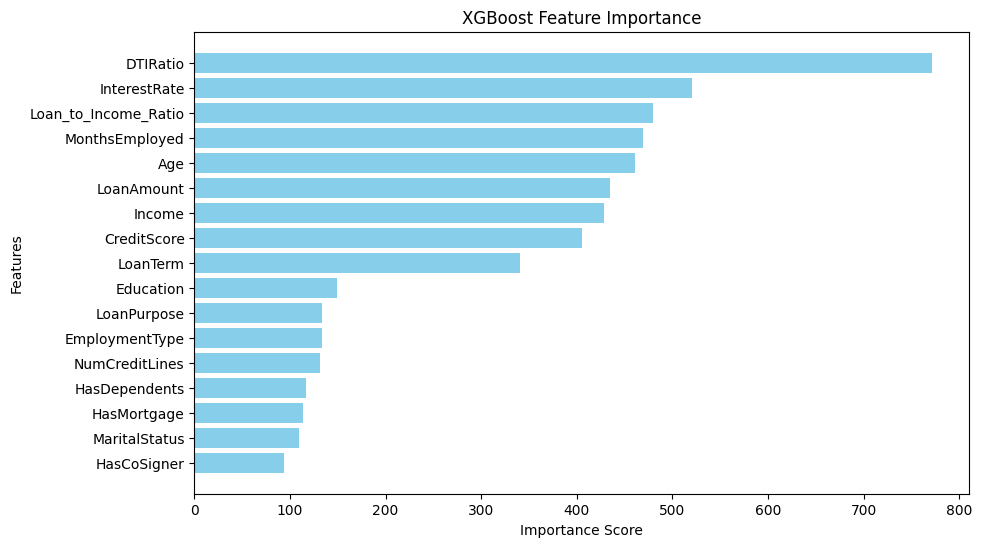

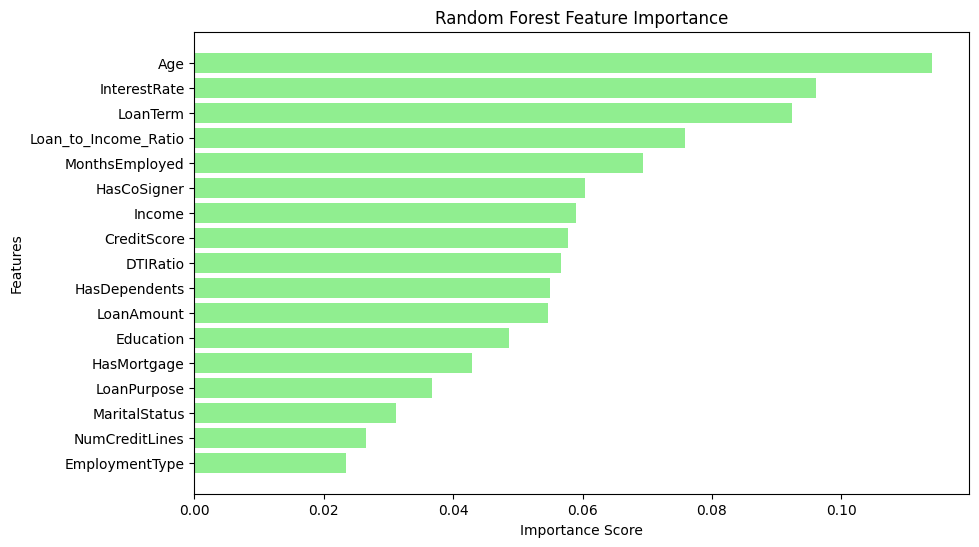

In [59]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import shap

xgboost_model = models["XGBoost"]
random_forest_model = models["Random Forest"]

if isinstance(X_train, np.ndarray):
    feature_names = data.drop(columns=['Default']).columns
    X_train = pd.DataFrame(X_train, columns=feature_names)

if hasattr(xgboost_model, "get_booster"):
    xgboost_model.get_booster().feature_names = list(feature_names)

xgb_feature_importance = xgboost_model.get_booster().get_score(importance_type='weight')

xgb_importance_df = pd.DataFrame({
    'Feature': list(xgb_feature_importance.keys()),
    'Importance': list(xgb_feature_importance.values())
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(xgb_importance_df['Feature'], xgb_importance_df['Importance'], color='skyblue')
plt.title("XGBoost Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.gca().invert_yaxis()
plt.show()

rf_feature_importance = random_forest_model.feature_importances_
rf_features = X_train.columns

rf_importance_df = pd.DataFrame({
    'Feature': rf_features,
    'Importance': rf_feature_importance
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(rf_importance_df['Feature'], rf_importance_df['Importance'], color='lightgreen')
plt.title("Random Forest Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.gca().invert_yaxis()
plt.show()

# **Logistic Regression Visualization**

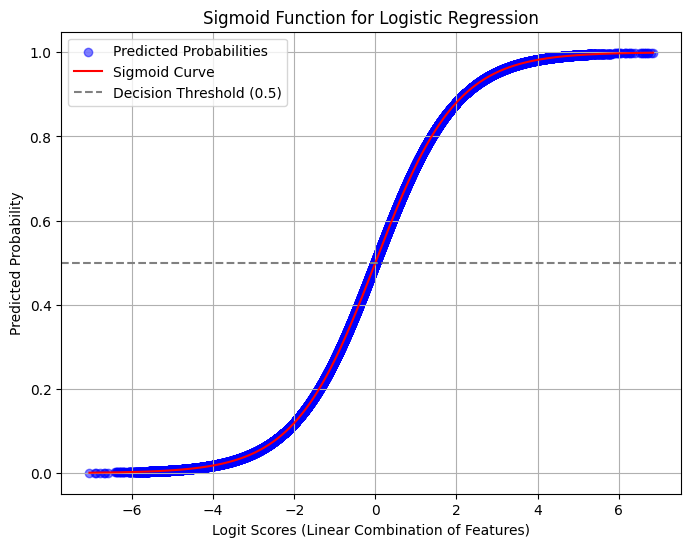

In [60]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

logistic_regression_model = models["Logistic Regression"]

coefficients = logistic_regression_model.coef_[0]
intercept = logistic_regression_model.intercept_[0]

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

logit_scores = np.dot(X_test, coefficients) + intercept

predicted_probabilities = sigmoid(logit_scores)

plt.figure(figsize=(8, 6))
plt.scatter(logit_scores, predicted_probabilities, color='blue', alpha=0.5, label="Predicted Probabilities")
plt.plot(np.sort(logit_scores), sigmoid(np.sort(logit_scores)), color='red', label="Sigmoid Curve")

plt.axhline(y=0.5, color='gray', linestyle='--', label="Decision Threshold (0.5)")

plt.title("Sigmoid Function for Logistic Regression")
plt.xlabel("Logit Scores (Linear Combination of Features)")
plt.ylabel("Predicted Probability")
plt.legend()
plt.grid(True)
plt.show()

# **Decision Tree visualization**

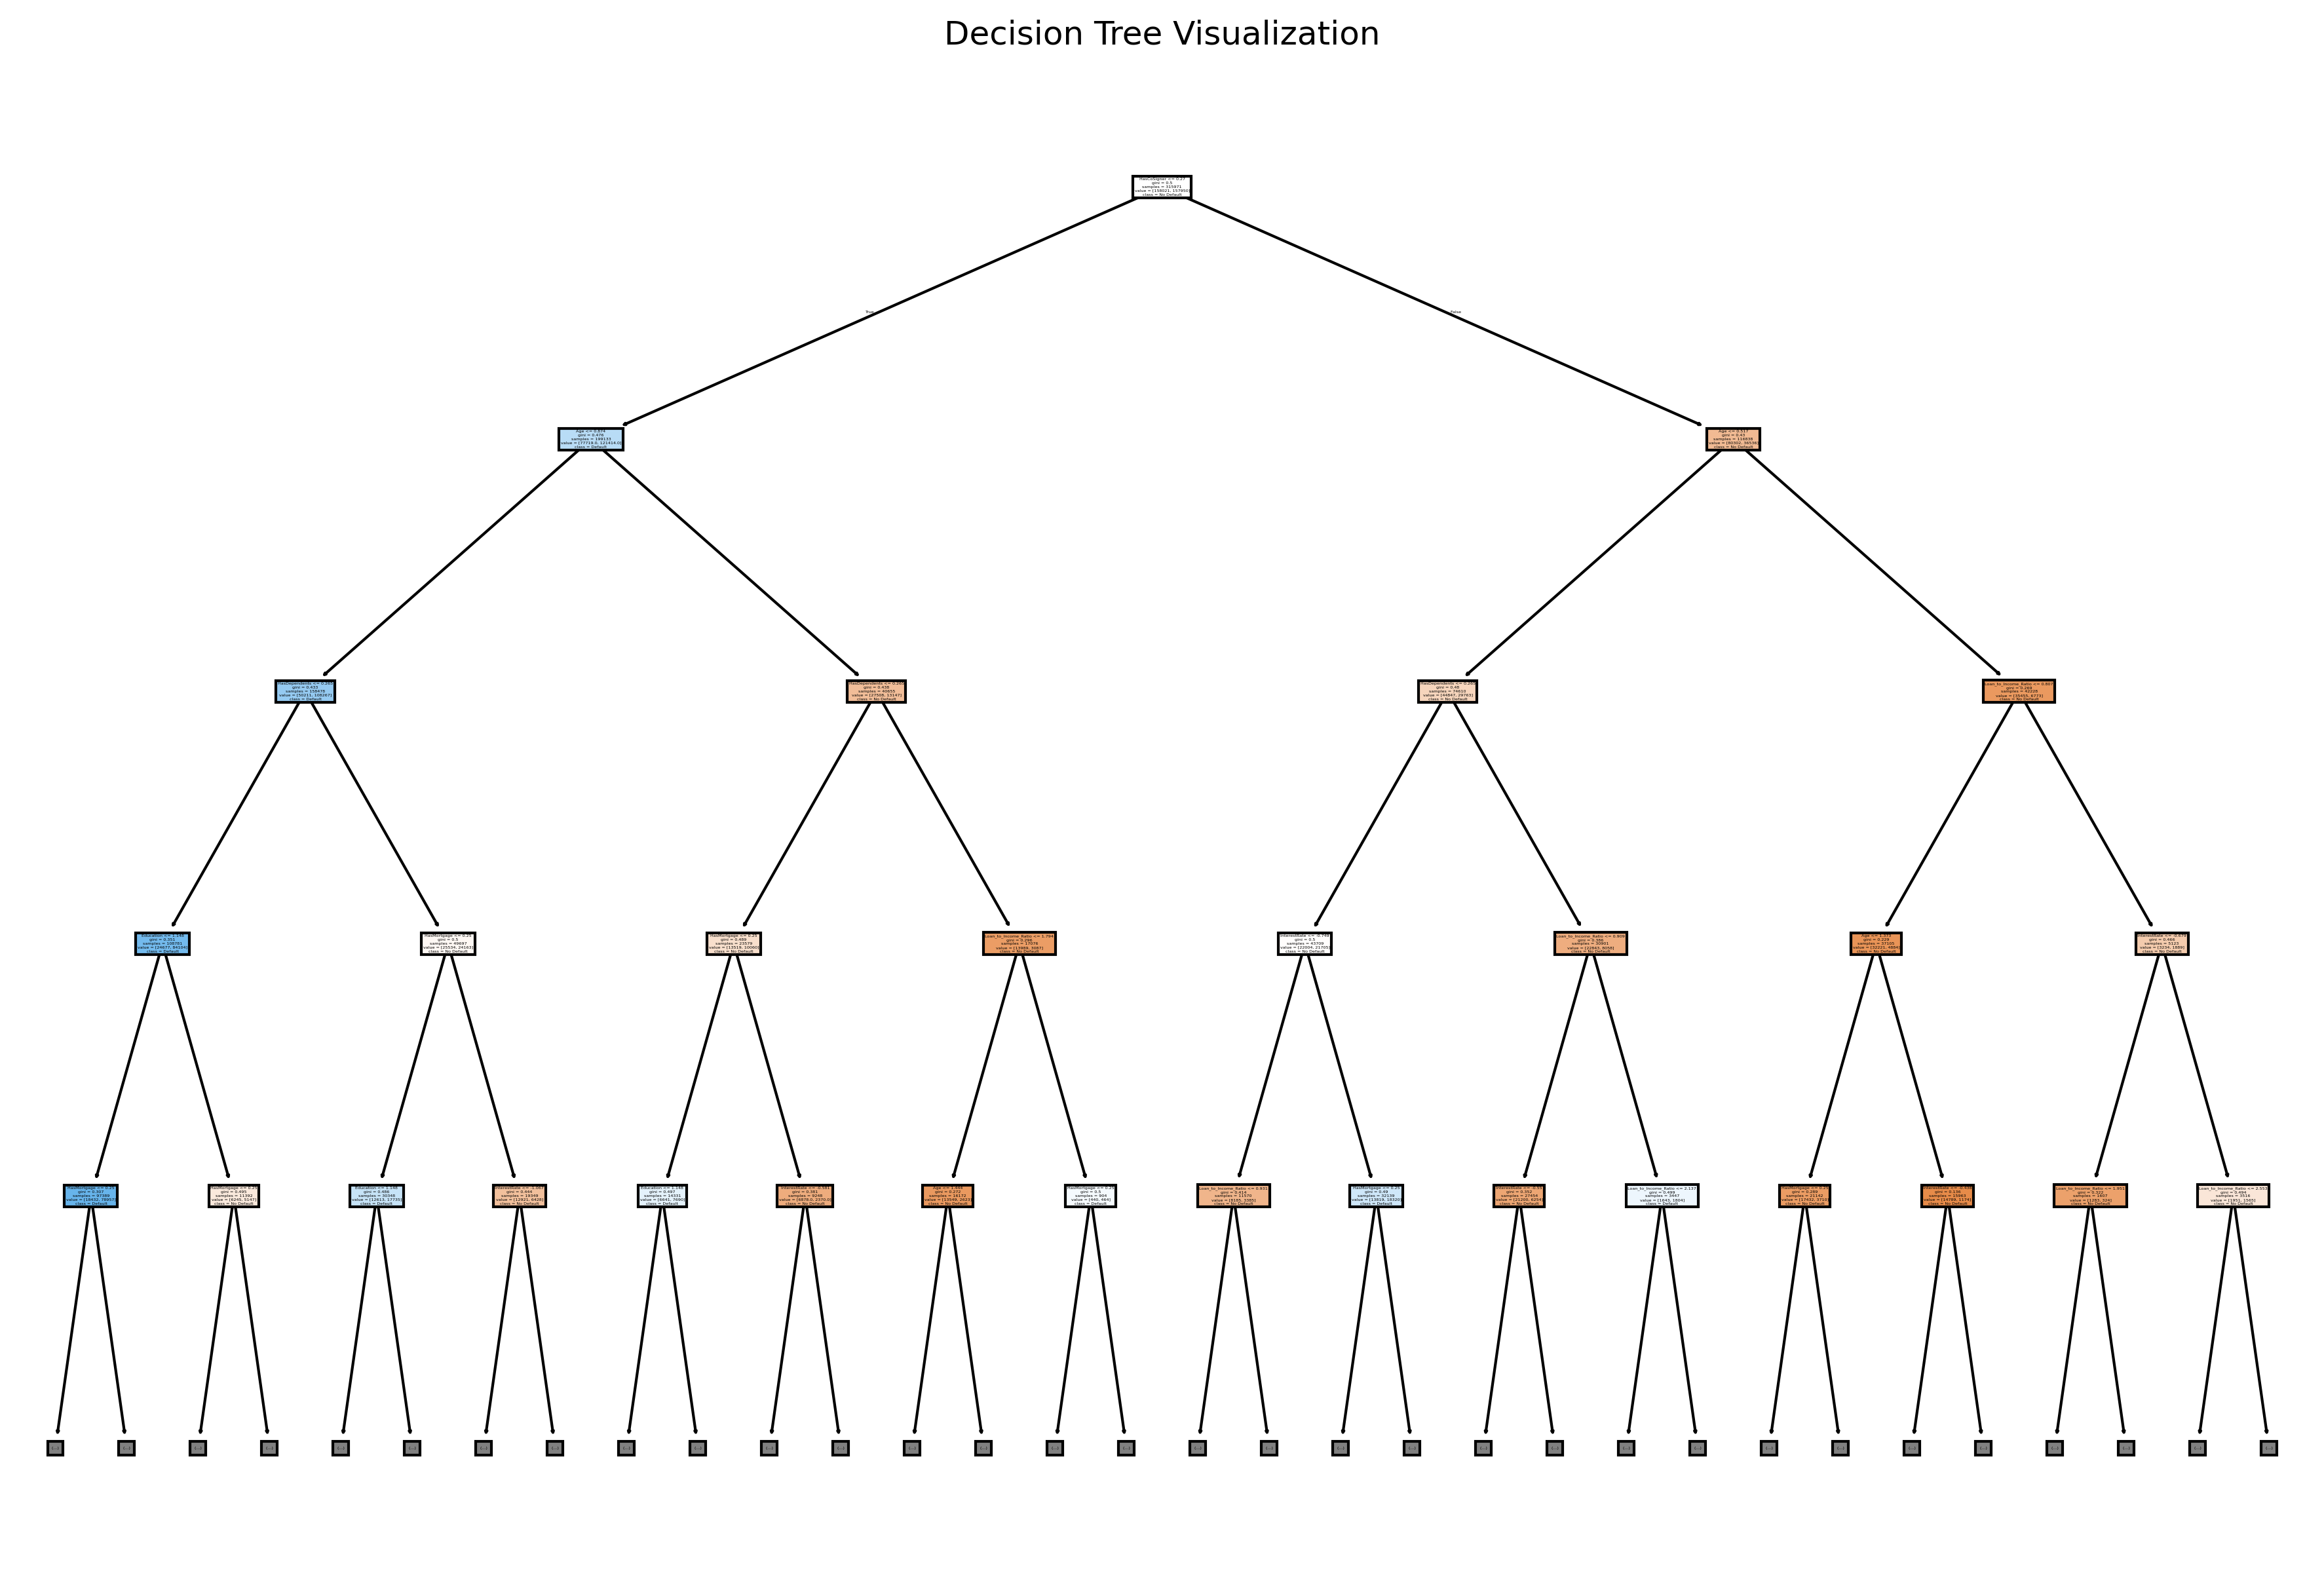

In [19]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

decision_tree_model = models["Decision Tree"]

plt.figure(figsize=(15, 10), dpi=300)
plot_tree(decision_tree_model, max_depth=4, filled=True, feature_names=X_train.columns, class_names=["No Default", "Default"])
plt.title("Decision Tree Visualization")
plt.show()

# **Real Time Case**

In [42]:
import pandas as pd

def predict_default(random_forest_model, feature_names):
    # Take user input for each feature
    print("Please provide the following details:")
    Age = float(input("Age: "))
    Income = float(input("Income: "))
    LoanAmount = float(input("Loan Amount: "))
    CreditScore = float(input("Credit Score: "))
    MonthsEmployed = float(input("Months Employed: "))
    NumCreditLines = float(input("Number of Credit Lines: "))
    InterestRate = float(input("Interest Rate: "))
    LoanTerm = float(input("Loan Term (in months): "))
    DTIRatio = float(input("Debt-to-Income Ratio: "))
    Education = input("Education (e.g., Bachelor's, Master's, High School): ")
    EmploymentType = input("Employment Type (e.g., Full-time, Part-time, Unemployed): ")
    MaritalStatus = input("Marital Status (e.g., Single, Married, Divorced): ")
    HasMortgage = input("Has Mortgage (Yes/No): ")
    HasDependents = input("Has Dependents (Yes/No): ")
    LoanPurpose = input("Loan Purpose (e.g., Home, Auto, Business): ")
    HasCoSigner = input("Has Co-Signer (Yes/No): ")

    input_data = {
        'Age': [Age],
        'Income': [Income],
        'LoanAmount': [LoanAmount],
        'CreditScore': [CreditScore],
        'MonthsEmployed': [MonthsEmployed],
        'NumCreditLines': [NumCreditLines],
        'InterestRate': [InterestRate],
        'LoanTerm': [LoanTerm],
        'DTIRatio': [DTIRatio],
        'Education': [Education],
        'EmploymentType': [EmploymentType],
        'MaritalStatus': [MaritalStatus],
        'HasMortgage': [HasMortgage],
        'HasDependents': [HasDependents],
        'LoanPurpose': [LoanPurpose],
        'HasCoSigner': [HasCoSigner]
    }

    input_df = pd.DataFrame(input_data)

    binary_cols = ['HasMortgage', 'HasDependents', 'HasCoSigner']
    for col in binary_cols:
        input_df[col] = input_df[col].apply(lambda x: 1 if x.lower() == 'yes' else 0)

    label_encoder = LabelEncoder()
    categorical_cols = ['Education', 'EmploymentType', 'MaritalStatus', 'LoanPurpose']
    for col in categorical_cols:

        input_df[col] = label_encoder.fit_transform(input_df[col])

    input_df['Loan_to_Income_Ratio'] = input_df['LoanAmount'] / input_df['Income']

    input_df = input_df.reindex(columns=feature_names, fill_value=0)

    input_scaled = scaler.transform(input_df)

    prediction = random_forest_model.predict(input_scaled)
    prediction_proba = random_forest_model.predict_proba(input_scaled)

    if prediction[0] == 1:
        print("\nThe model predicts that the loan will DEFAULT.")
    else:
        print("\nThe model predicts that the loan will NOT DEFAULT.")

    print(f"Probability of Default: {prediction_proba[0][1]:.2f}")
    print(f"Probability of Non-Default: {prediction_proba[0][0]:.2f}")

predict_default(random_forest_model, X_train.columns)

Please provide the following details:
Age: 45
Income: 200000
Loan Amount: 1000
Credit Score: 500
Months Employed: 85
Number of Credit Lines: 2
Interest Rate: 8
Loan Term (in months): 8
Debt-to-Income Ratio: 0.2
Education (e.g., Bachelor's, Master's, High School): Phd
Employment Type (e.g., Full-time, Part-time, Unemployed): Full-time
Marital Status (e.g., Single, Married, Divorced): Single
Has Mortgage (Yes/No): Yes
Has Dependents (Yes/No): Yes
Loan Purpose (e.g., Home, Auto, Business): Auto
Has Co-Signer (Yes/No): Yes

The model predicts that the loan will NOT DEFAULT.
Probability of Default: 0.21
Probability of Non-Default: 0.79
